In [18]:
# https://builtin.com/data-science/data-clustering-python

from sklearn.mixture import GaussianMixture
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns 

In [19]:
# Load data into a pandas DataFrame
adjASID = pd.ExcelFile ('Australian_Shark_Incident_Database_Public_Version-Adjusted.xlsx')
filteredASID = pd.read_excel (adjASID, 'Filtered_ASID')
filteredASID

,Season,State,Location,Shark Name,Shark Length,Provoked?,Activity,Gender,Age,Clothing,Clothing Colour
0,Summer,NSW,coastal,white shark,4.0-4.4,unprovoked,swimming,male,20-24,swimwear,blue
1,Fall,SA,coastal,white shark,3.5-3.9,provoked,spearfishing,male,20-24,wetsuit/drysuit,black
2,Fall,VIC,coastal,dusky shark,2.5-2.9,provoked,spearfishing,male,20-24,wetsuit/drysuit,black
3,Spring,VIC,island open ocean,white shark,4.0-4.4,provoked,snorkelling,male,25-29,wetsuit/drysuit,black
4,Summer,NSW,coastal,white shark,2.5-2.9,unprovoked,swimming,male,10-14,swimwear,green
...,...,...,...,...,...,...,...,...,...,...,...
96,Winter,WA,coastal,white shark,4.0-4.4,provoked,spearfishing,male,25-29,wetsuit/drysuit,black
97,Fall,TAS,coastal,seven gill shark,2.0-2.4,provoked,spearfishing,male,20-24,wetsuit,black
98,Fall,WA,estuary/harbour,bull shark,2.5-2.9,provoked,other: hull scraping,male,20-24,wetsuit,black
99,Winter,WA,island open ocean,unknown,2.5-2.9,unprovoked,snorkelling,female,50-54,wetsuit,black


In [20]:
# Separate features
X = filteredASID.drop('Shark Name', axis=1)  # Features
y = filteredASID ['Shark Name']

In [21]:
X_encoded = pd.get_dummies (X)
X_encoded

,Season_Fall,Season_Spring,Season_Summer,Season_Winter,State_NSW,State_QLD,State_SA,State_TAS,State_VIC,State_WA,...,"Clothing Colour_multicolour: black, grey","Clothing Colour_multicolour: black, orange","Clothing Colour_multicolour: black, purple","Clothing Colour_multicolour: black, silver","Clothing Colour_multicolour: black, white","Clothing Colour_multicolour: blue, grey","Clothing Colour_multicolour: blue, white",Clothing Colour_other: kahki,Clothing Colour_purple,Clothing Colour_red
0,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
97,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
98,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
99,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled

array([[-0.49690399, -0.55829053,  1.57567719, ..., -0.1       ,
        -0.1       , -0.1       ],
       [ 2.01246118, -0.55829053, -0.63464776, ..., -0.1       ,
        -0.1       , -0.1       ],
       [ 2.01246118, -0.55829053, -0.63464776, ..., -0.1       ,
        -0.1       , -0.1       ],
       ...,
       [ 2.01246118, -0.55829053, -0.63464776, ..., -0.1       ,
        -0.1       , -0.1       ],
       [-0.49690399, -0.55829053, -0.63464776, ..., -0.1       ,
        -0.1       , -0.1       ],
       [-0.49690399, -0.55829053,  1.57567719, ..., -0.1       ,
        -0.1       , -0.1       ]])

In [23]:
n_clusters = 6
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X_scaled)

GaussianMixture(n_components=6)

In [24]:
cluster_labels = gmm_model.predict(X_scaled)
X = pd.DataFrame(X_scaled)
X['cluster'] = cluster_labels

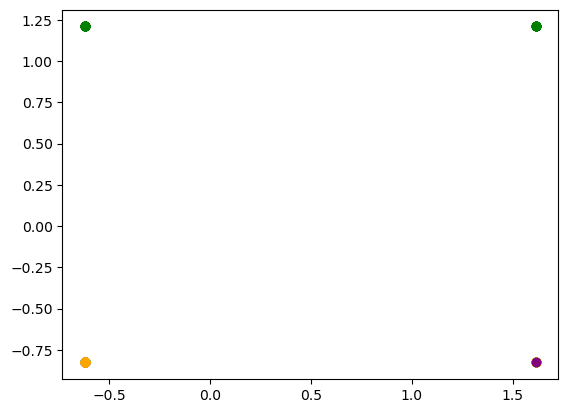

In [30]:
colors =  ['red','green','blue','yellow','orange','purple']
# print (X[X["cluster"]==1])
for k in range(0,n_clusters):
    data = X[X["cluster"]==k]
    plt.scatter(data[3],data[29],c=colors[k])
# data [x] and data [y] are the various factor columns, which makes this plot nonsensical